In [3]:

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:

import pandas as pd
import numpy as np

In [5]:
data_df = pd.read_csv('Social Media Engagement Dataset.csv')

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [7]:
data_df.describe(include='all')

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
count,12000,12000,12000,12000,12000,12000,12000,12000,12000,8059,...,12000.00000,12000.000000,12000.000000,12000,12000,12000,12000,12000.000000,12000.000000,12000.000000
unique,12000,11997,7,5,12000,33,10,11997,4490,225,...,NaN,NaN,NaN,10,70,23,3,NaN,NaN,NaN
top,638tldv060me,2024-07-29 19:40:44,Wednesday,YouTube,user_04o7c7eq,"Milan, Italy",ja,Loving it with my new Pepsi Zero Sugar from Pe...,#NewRelease,@RetailSupport,...,NaN,NaN,NaN,Microsoft,Coca-Cola Vanilla,CyberMonday,Pre-Launch,NaN,NaN,NaN
freq,1,2,1771,2436,1,403,1234,2,153,286,...,NaN,NaN,NaN,1239,226,573,4006,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.34575,49811.338500,0.278137,NaN,NaN,NaN,NaN,0.001472,0.000998,0.729692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,288.68416,28930.289451,1.149206,NaN,NaN,NaN,NaN,0.576627,0.289940,57.787219
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,130.000000,0.001880,NaN,NaN,NaN,NaN,-0.999600,-0.499900,-99.900000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,253.00000,24716.500000,0.049100,NaN,NaN,NaN,NaN,-0.495975,-0.248400,-48.700000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,503.00000,49674.000000,0.080605,NaN,NaN,NaN,NaN,0.001950,0.002800,0.900000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,755.00000,74815.000000,0.163123,NaN,NaN,NaN,NaN,0.501725,0.250700,50.100000


In [8]:
data_df.isnull().sum()

,0
post_id,0
timestamp,0
day_of_week,0
platform,0
user_id,0
location,0
language,0
text_content,0
hashtags,0
mentions,3941


In [10]:

duplicate = data_df[['text_content']].duplicated()
data_df      = data_df.loc[duplicate==False]
data_df = data_df.reset_index(drop=True)
print('Drop Duplicated:',duplicate.sum())

Drop Duplicated: 3


In [12]:
data_df.shape

(11997, 28)

In [14]:
import re
def  clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip()  # Remove leading and trailing spaces
    return text

# Apply the clean_text function to the 'text' column
data_df['Cleaned_Text'] = data_df['text_content'].apply(lambda x:  clean_text(str(x)) if pd.notnull(x) else '')

In [15]:

data_df['Cleaned_Text'] = data_df['Cleaned_Text'].str.lower()

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
data_df['Cleaned_Text'] = data_df['Cleaned_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Apply
data_df['Cleaned_Text'] = data_df['Cleaned_Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
data_df.head()


,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,Cleaned_Text
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1,try chromebook google best purchase ever food ...
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6,saw ad microsoft surface laptop springblast202...
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4,opinion nike epic react promo food trend reall...
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5,bum new diet pepsi pepsi disappoint quality re...
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8,try corolla toyota absolutely love health trav...


In [21]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= 0.05:
        return 'positive'
    elif vs['compound'] > -0.05 and vs['compound'] < 0.05:
        return 'neutral'
    else:
        return 'negative'


In [24]:

data_df.loc[:, 'sentiment_vader'] = data_df['Cleaned_Text'].apply(analyze_sentiment_vader)

In [25]:
data_df = data_df.drop(columns=['text_content'])

In [26]:

data_df.head(10)

,post_id,timestamp,day_of_week,platform,user_id,location,language,hashtags,mentions,keywords,...,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,Cleaned_Text,sentiment_vader
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,#Food,NaN,"price, unique, traditional, efficient",...,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1,try chromebook google best purchase ever food ...,positive
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,"#MustHave, #Food","@CustomerService, @BrandCEO","delivery, slow",...,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6,saw ad microsoft surface laptop springblast202...,positive
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,"#Promo, #Food, #Trending",NaN,"reliable, budget, durable, experience",...,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4,opinion nike epic react promo food trend reall...,positive
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport","improved, competitive, luxury, fast",...,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5,bum new diet pepsi pepsi disappoint quality re...,negative
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,"#Health, #Travel","@BrandSupport, @InfluencerName","innovation, budget, helpful, luxury",...,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8,try corolla toyota absolutely love health trav...,positive
5,e8rzr949rzkr,2024-07-28 03:21:09,Sunday,Reddit,user_jzvf44eq,"Seoul, South Korea",pt,#Discount,NaN,"fast, outdated, luxury, disappointing",...,0.64908,Nike,React,CyberMonday,Pre-Launch,0.9095,-0.4563,16.0,nike powerrelease subpar wait see come next di...,positive
6,32qywmjy84gk,2024-08-21 17:02:47,Wednesday,Instagram,user_hpr07vl1,"Madrid, Spain",ja,"#Quality, #Promo, #Limited",NaN,"improved, unique, premium, durable",...,0.16139,Pepsi,Pepsi Wild Cherry,GlobalCampaign,Launch,-0.9263,-0.0810,-13.4,sure new pepsi wild cherry pepsi worth money q...,positive
7,wu063ci6mizp,2025-01-27 16:09:54,Monday,Reddit,user_2es9a4lv,"São Paulo, Brazil",es,"#MustHave, #Discount","@MarketingTeam, @InfluencerName","efficient, innovation, performance",...,0.04442,Coca-Cola,Coke Zero,CustomerFirst,Post-Launch,-0.9831,0.2152,89.7,saw ad coca cola coke zero launchwave worth ev...,positive
8,9q2i3owe4tv9,2024-11-29 17:03:41,Friday,Reddit,user_omh7bn2t,"Milan, Italy",ru,"#Deal, #Fashion",@TrendSetter,"sustainable, competitive",...,0.03274,Coca-Cola,Coke Zero,SpringBlast2025,Launch,-0.8119,-0.1949,-29.0,try coke zero coca cola absolutely love deal f...,positive
9,gkyad7r8w6g5,2025-02-27 23:21:02,Thursday,YouTube,user_kp84hgj9,"Houston, USA",es,"#Tech, #SpecialOffer",@BrandSupport,"disappointing, excellent, cheap",...,0.06759,Google,Pixel Watch,CyberMonday,Launch,-0.1217,0.1390,-56.6,one week review google pixel watch disappoint ...,negative


In [27]:

data_df.to_csv('data_SentimentVADER.csv', index=False)

In [28]:
data_new_df = pd.read_csv('data_SentimentVADER.csv')

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


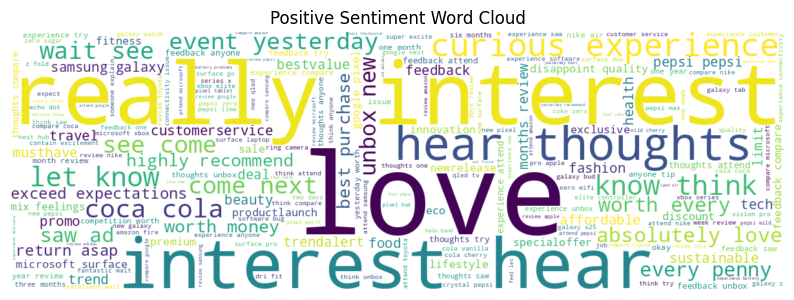

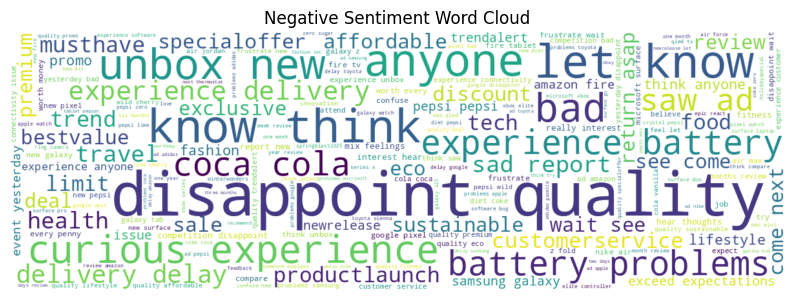

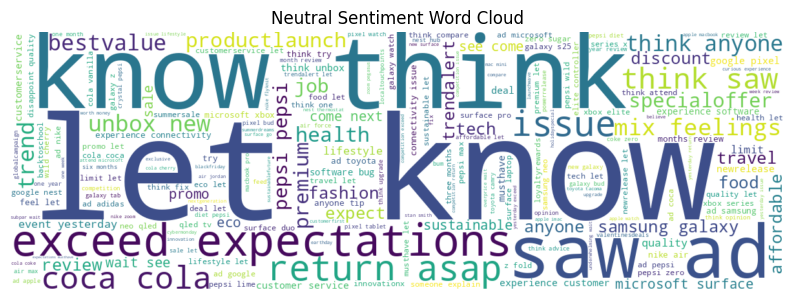

In [31]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=1200, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
positive_text = ' '.join(data_new_df[data_new_df['sentiment_vader'] == 'positive']['Cleaned_Text'])
negative_text = ' '.join(data_new_df[data_new_df['sentiment_vader'] == 'negative']['Cleaned_Text'])
neutral_text = ' '.join(data_new_df[data_new_df['sentiment_vader'] == 'neutral']['Cleaned_Text'])

generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud')
generate_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

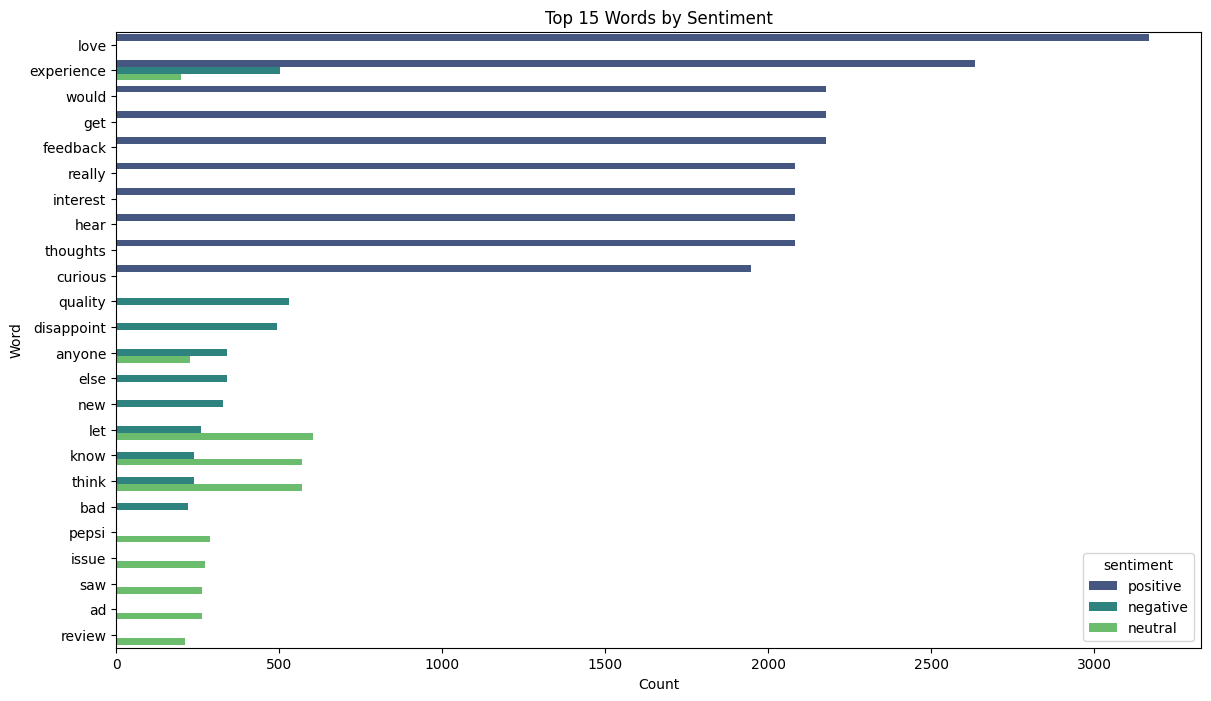

In [34]:
from collections import Counter

# Tokenize text and count word frequencies for each sentiment
def get_top_n_words(text, n=10):
    words = text.split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(n)
    return common_words

# Get top 15 words for each sentiment
positive_words = get_top_n_words(positive_text, 10)
negative_words = get_top_n_words(negative_text, 10)
neutral_words = get_top_n_words(neutral_text, 10)

# Create dataframes for plotting
def create_freq_df(common_words, sentiment):
    words, counts = zip(*common_words)
    return pd.DataFrame({'word': words, 'count': counts, 'sentiment': sentiment})

df_positive = create_freq_df(positive_words, 'positive')
df_negative = create_freq_df(negative_words, 'negative')
df_neutral = create_freq_df(neutral_words, 'neutral')

# Combine dataframes
freq_df = pd.concat([df_positive, df_negative, df_neutral])

# Plot the frequency bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='word', hue='sentiment', data=freq_df, palette='viridis')
plt.title('Top 15 Words by Sentiment')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

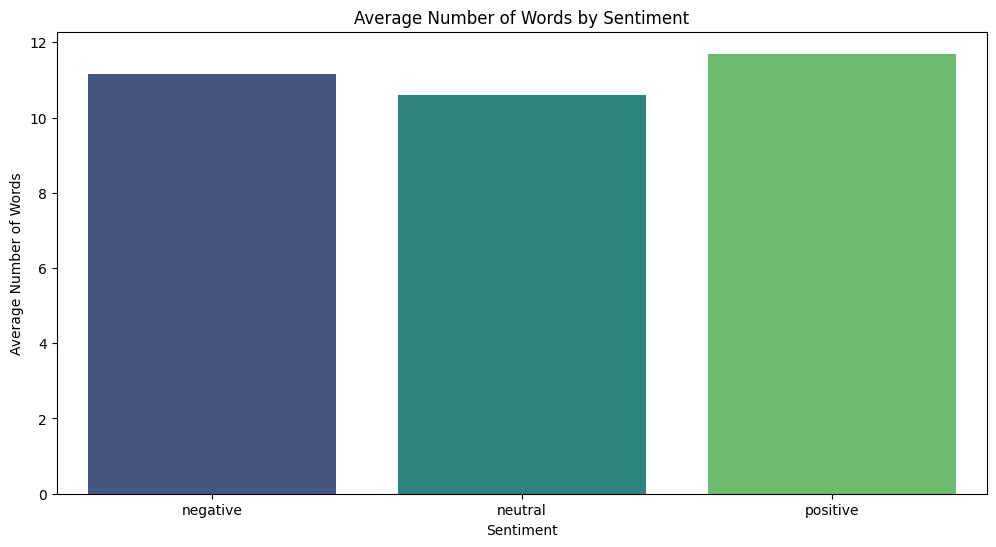

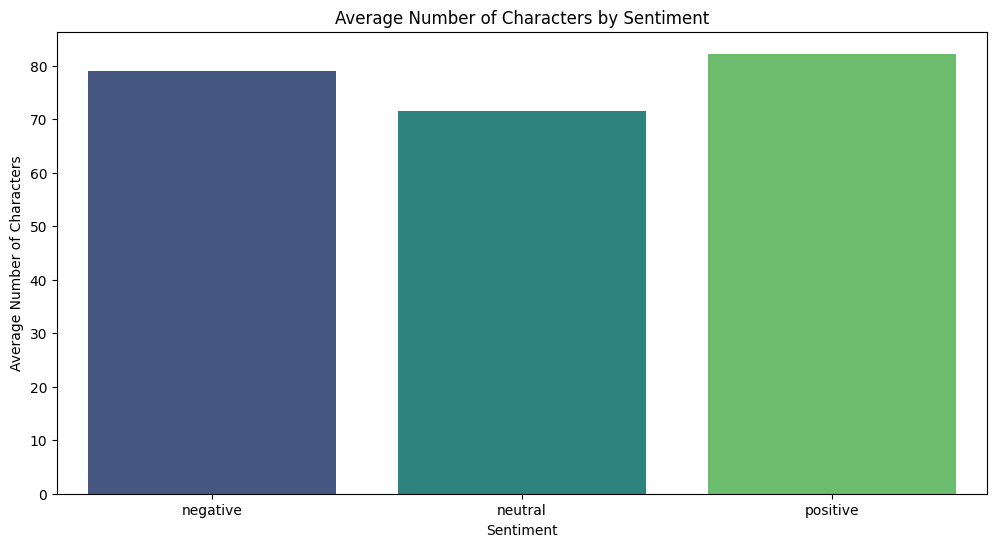

In [35]:
# Calculate number of words and characters for each entry
data_new_df['word_count'] = data_new_df['Cleaned_Text'].apply(lambda x: len(x.split()))
data_new_df['char_count'] = data_new_df['Cleaned_Text'].apply(lambda x: len(x))

# Group by sentiment and calculate the average word and character counts
word_count_by_sentiment = data_new_df.groupby('sentiment_vader')['word_count'].mean().reset_index()
char_count_by_sentiment = data_new_df.groupby('sentiment_vader')['char_count'].mean().reset_index()

# Plot the average number of words by sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment_vader', y='word_count', data=word_count_by_sentiment, palette='viridis')
plt.title('Average Number of Words by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Words')
plt.show()

# Plot the average number of characters by sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment_vader', y='char_count', data=char_count_by_sentiment, palette='viridis')
plt.title('Average Number of Characters by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Characters')
plt.show()

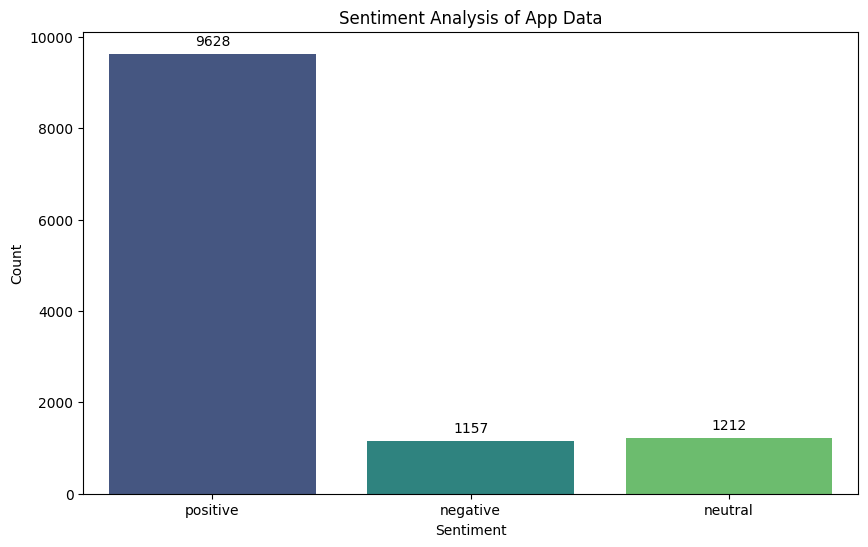

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_vader', data=data_new_df, palette='viridis')
plt.title('Sentiment Analysis of App Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

plt.show()

In [38]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate the class weights
unique_classes = np.unique(data_new_df['sentiment_vader'])
class_weights = compute_class_weight('balanced',
                                     classes=unique_classes,
                                     y=data_new_df['sentiment_vader'])

class_weights_dict = {unique_classes[i]: class_weights[i] for i in range(len(class_weights))}
print(class_weights_dict)

{'negative': np.float64(3.456352636127917), 'neutral': np.float64(3.2995049504950495), 'positive': np.float64(0.415351059410054)}


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_new_df['sentiment_encoded'] = label_encoder.fit_transform(data_new_df['sentiment_vader'])
data_new_df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,hashtags,mentions,keywords,...,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,Cleaned_Text,sentiment_vader,word_count,char_count,sentiment_encoded
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,#Food,NaN,"price, unique, traditional, efficient",...,BlackFriday,Launch,0.0953,-0.3672,19.1,try chromebook google best purchase ever food ...,positive,11,75,2
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,"#MustHave, #Food","@CustomerService, @BrandCEO","delivery, slow",...,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6,saw ad microsoft surface laptop springblast202...,positive,10,73,2
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,"#Promo, #Food, #Trending",NaN,"reliable, budget, durable, experience",...,BlackFriday,Post-Launch,0.2855,-0.4112,17.4,opinion nike epic react promo food trend reall...,positive,11,70,2
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport","improved, competitive, luxury, fast",...,LaunchWave,Launch,-0.2094,-0.0167,-5.5,bum new diet pepsi pepsi disappoint quality re...,negative,9,62,0
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,"#Health, #Travel","@BrandSupport, @InfluencerName","innovation, budget, helpful, luxury",...,LocalTouchpoints,Launch,0.6867,0.0807,38.8,try corolla toyota absolutely love health trav...,positive,11,78,2


In [42]:

data_new_df[data_new_df['Cleaned_Text'].isna()]

,post_id,timestamp,day_of_week,platform,user_id,location,language,hashtags,mentions,keywords,...,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,Cleaned_Text,sentiment_vader,word_count,char_count,sentiment_encoded


In [44]:
!pip install tensorflow

In [46]:

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<nothing>')

In [47]:

tokenizer.fit_on_texts(data_new_df['Cleaned_Text'])

In [48]:

tokenizer.word_index

{'<nothing>': 1,
 'experience': 2,
 'love': 3,
 'new': 4,
 'let': 5,
 'would': 6,
 'get': 7,
 'feedback': 8,
 'know': 9,
 'think': 10,
 'pepsi': 11,
 'really': 12,
 'interest': 13,
 'hear': 14,
 'thoughts': 15,
 'review': 16,
 'curious': 17,
 'quality': 18,
 'worth': 19,
 'coca': 20,
 'cola': 21,
 'recommend': 22,
 'anyone': 23,
 'apple': 24,
 'microsoft': 25,
 'adidas': 26,
 'nike': 27,
 'unbox': 28,
 'saw': 29,
 'ad': 30,
 'samsung': 31,
 'google': 32,
 'else': 33,
 'wait': 34,
 'see': 35,
 'come': 36,
 'next': 37,
 'compare': 38,
 'competition': 39,
 'toyota': 40,
 'attend': 41,
 'event': 42,
 'yesterday': 43,
 'try': 44,
 'amazon': 45,
 'issue': 46,
 'disappoint': 47,
 'fitness': 48,
 'bestvalue': 49,
 'specialoffer': 50,
 'promo': 51,
 'fashion': 52,
 'health': 53,
 'trend': 54,
 'sustainable': 55,
 'premium': 56,
 'musthave': 57,
 'affordable': 58,
 'beauty': 59,
 'deal': 60,
 'trendalert': 61,
 'lifestyle': 62,
 'eco': 63,
 'travel': 64,
 'newrelease': 65,
 'food': 66,
 'product

In [49]:
tokenizer.document_count

11997

In [ ]:
tokenizer.document_count

In [50]:
data_new_df['Cleaned_Text'].iloc[0]

'try chromebook google best purchase ever food really interest hear thoughts'

In [51]:

sequences = tokenizer.texts_to_sequences(data_new_df['Cleaned_Text'])
sequences

[[44, 218, 32, 85, 86, 87, 66, 12, 13, 14, 15],
 [29, 30, 25, 88, 140, 150, 19, 81, 57, 66],
 [124, 27, 220, 118, 51, 66, 54, 12, 13, 14, 15],
 [133, 4, 108, 11, 11, 47, 18, 16, 55],
 [44, 238, 40, 70, 3, 53, 64, 12, 13, 14, 15],
 [27, 141, 242, 34, 35, 36, 37, 77, 17, 2],
 [151, 4, 11, 179, 103, 11, 19, 81, 18, 51, 76],
 [29, 30, 20, 21, 105, 102, 180, 19, 78, 79, 57, 77],
 [44, 105, 102, 20, 21, 70, 3, 60, 52, 6, 3, 7, 8],
 [89, 132, 16, 32, 90, 93, 47, 18, 68, 50, 17, 2],
 [44, 227, 228, 45, 85, 86, 87, 63, 62, 5, 9, 10],
 [122, 32, 90, 106, 48, 17, 2],
 [11, 167, 240, 34, 35, 36, 37, 54, 77, 68, 5, 9, 10],
 [28, 4, 227, 228, 45, 95, 162, 67, 53, 17, 2],
 [38, 31, 71, 157, 39, 19, 81, 56, 16, 66, 12, 13, 14, 15],
 [28, 4, 88, 142, 25, 47, 18, 183, 184, 77, 63],
 [41, 25, 163, 42, 43, 22, 58, 12, 13, 14, 15],
 [117, 25, 101, 152, 153, 49, 17, 2],
 [23, 33, 2, 114, 115, 20, 21, 20, 21, 136, 100, 67, 58],
 [23, 33, 2, 126, 127, 11, 11, 104, 73, 74, 50, 51],
 [134, 135, 16, 40, 215, 19,

In [52]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 44, 218,  32, ...,   0,   0,   0],
       [ 29,  30,  25, ...,   0,   0,   0],
       [124,  27, 220, ...,   0,   0,   0],
       ...,
       [ 28,   4, 200, ...,   0,   0,   0],
       [ 38,  40, 216, ...,   0,   0,   0],
       [ 29,  30,  24, ...,   0,   0,   0]], dtype=int32)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, data_new_df['sentiment_encoded'], test_size=0.2, random_state=42)


In [55]:

X_train[0]

array([130,  94,  16,  32, 109, 209, 100,  57,   6,   3,   7,   8,   0,
         0,   0,   0,   0,   0], dtype=int32)

In [56]:

print(f'Total data for training : {X_train.shape[0]}')
print(f'Total data for testing : {X_test.shape[0]}')
print(f"""Total sentiments counts for train data :
     {y_train.value_counts()}""")
print(f"""Total sentiments counts for test data :
     {y_test.value_counts()}""")

Total data for training : 9597
Total data for testing : 2400
Total sentiments counts for train data : 
     sentiment_encoded
2    7688
1     970
0     939
Name: count, dtype: int64
Total sentiments counts for test data : 
     sentiment_encoded
2    1940
1     242
0     218
Name: count, dtype: int64


In [57]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 18


In [58]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 63840
embedding_dim = 64
max_length = maxlen

model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer = regularizers.l2(0.0005)),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001),)
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated.h5', save_best_only=True)
]

In [60]:
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks, class_weight=class_weights_dict)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.4255 - loss: 2.0962

60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.4267 - loss: 2.0848 - val_accuracy: 0.7917 - val_loss: 0.9817
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.6799 - loss: 0.6179

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.6809 - loss: 0.6166 - val_accuracy: 0.7917 - val_loss: 0.7519
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8604 - loss: 0.3651

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - accuracy: 0.8606 - loss: 0.3649 - val_accuracy: 0.7964 - val_loss: 0.6340
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9122 - loss: 0.3025

60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9125 - loss: 0.3019 - val_accuracy: 0.8620 - val_loss: 0.4800
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9521 - loss: 0.2151

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.9522 - loss: 0.2150 - val_accuracy: 0.8568 - val_loss: 0.3628
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9658 - loss: 0.1988 - val_accuracy: 0.8224 - val_loss: 0.3817
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9688 - loss: 0.1777

60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.9687 - loss: 0.1778 - val_accuracy: 0.9214 - val_loss: 0.2060
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.9686 - loss: 0.1743 - val_accuracy: 0.8427 - val_loss: 0.5212
Epoch 9/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9557 - loss: 0.1797

60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.9558 - loss: 0.1796 - val_accuracy: 0.9594 - val_loss: 0.1729
Epoch 10/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9647 - loss: 0.1720 - val_accuracy: 0.9224 - val_loss: 0.2260
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9742 - loss: 0.1581

60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.9742 - loss: 0.1578 - val_accuracy: 0.9755 - val_loss: 0.1143
Epoch 12/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9751 - loss: 0.1330 - val_accuracy: 0.9714 - val_loss: 0.1224
Epoch 13/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9757 - loss: 0.1292

60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9757 - loss: 0.1292 - val_accuracy: 0.9828 - val_loss: 0.0987
Epoch 14/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.9841 - loss: 0.1324 - val_accuracy: 0.9755 - val_loss: 0.1011
Epoch 15/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9807 - loss: 0.1036

60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.9808 - loss: 0.1036 - val_accuracy: 0.9797 - val_loss: 0.0937


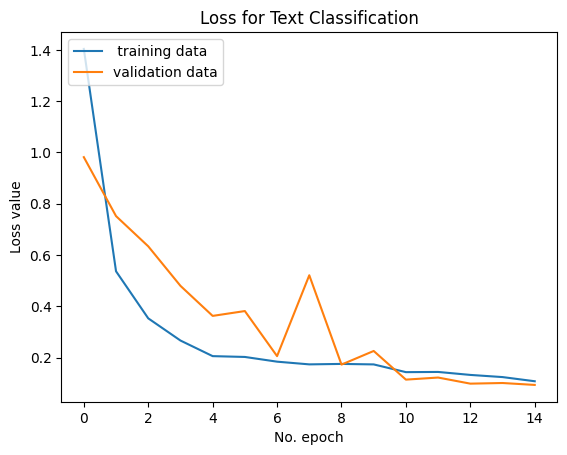

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

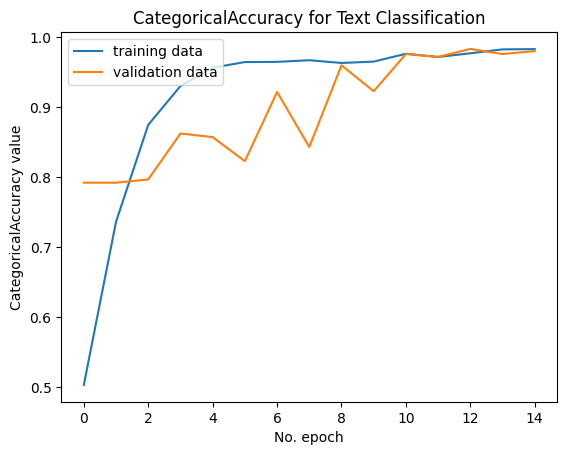

In [62]:
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [63]:

from tensorflow.keras.models import load_model

best_model = load_model('best_model_updated.h5')

In [64]:
print("Generate predictions for all samples")
predictions = best_model.predict(X_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
[[0.0062826  0.00519511 0.9885223 ]
 [0.00238534 0.00248287 0.99513173]
 [0.00500673 0.00655544 0.9884378 ]
 ...
 [0.00197182 0.00110293 0.9969253 ]
 [0.00169672 0.00126038 0.99704283]
 [0.00143783 0.00109503 0.99746716]]


In [65]:
print(predict_results.shape)
y_pred = predict_results
print(y_pred)

(2400,)
[2 2 2 ... 2 2 2]


In [102]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy LSTM: {accuracy * 100:.2f}%')

Accuracy LSTM: 98.00%


In [68]:
from sklearn.metrics import classification_report

In [69]:

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.95      0.94      0.95       218
     neutral       0.88      0.98      0.93       242
    positive       1.00      0.98      0.99      1940

    accuracy                           0.98      2400
   macro avg       0.94      0.97      0.96      2400
weighted avg       0.98      0.98      0.98      2400



Text(50.722222222222214, 0.5, 'y_pred')

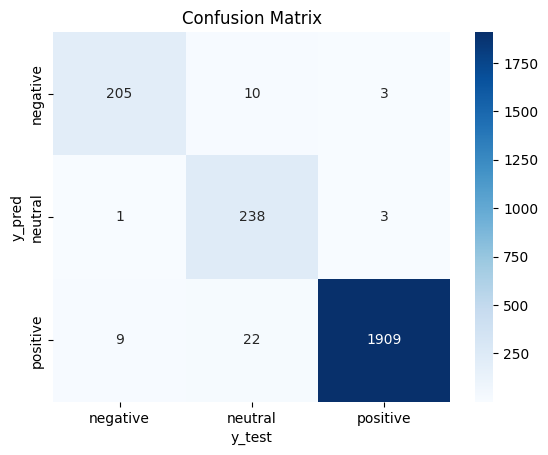

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

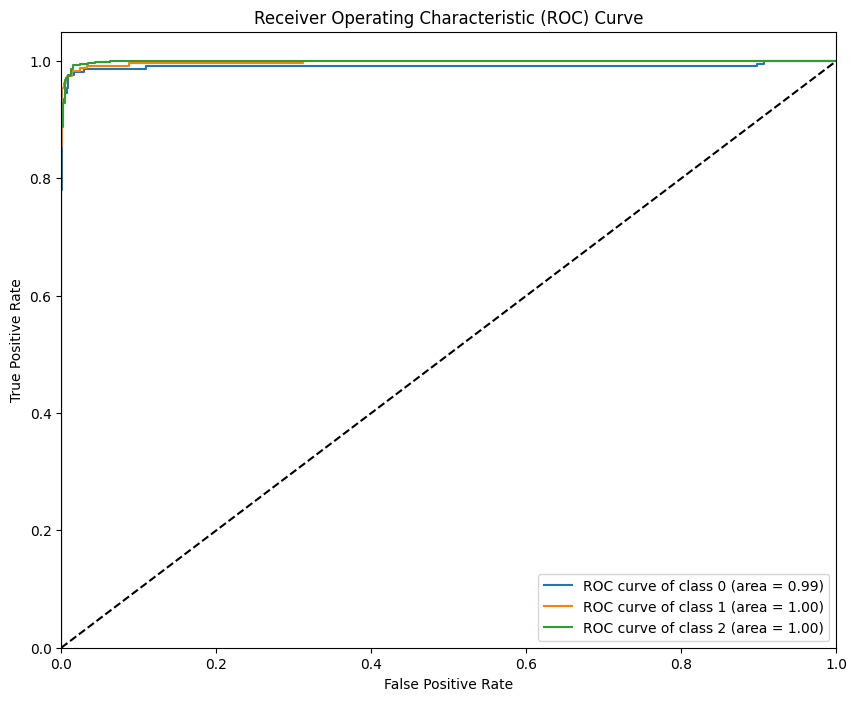

Micro-average ROC AUC score: 1.00
Macro-average ROC AUC score: 1.00


In [71]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

n_classes = predictions.shape[1]

# Binarize the output labels for ROC curve computation
y_val_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print micro-average and macro-average ROC AUC scores
print(f'Micro-average ROC AUC score: {roc_auc["micro"]:.2f}')
print(f'Macro-average ROC AUC score: {roc_auc["macro"]:.2f}')

**Now Applying CNN model to the same**

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [74]:
print(vocab_size, embedding_dim, max_length)

63840 64 18


In [75]:
vocab_size = 5000
embedding_dim = 100
max_length = 50

model = Sequential([
    Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(24, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:

# Callbacks
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated_CNN.h5', save_best_only=True)
]

In [77]:
# Fit the model with callbacks
history_CNN = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks2, class_weight=class_weights_dict)

Epoch 1/15
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4451 - loss: 1.1841

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4484 - loss: 1.1732 - val_accuracy: 0.8073 - val_loss: 0.8984
Epoch 2/15
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6622 - loss: 0.6971

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6644 - loss: 0.6947 - val_accuracy: 0.8172 - val_loss: 0.6935
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8067 - loss: 0.4902

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8071 - loss: 0.4894 - val_accuracy: 0.8443 - val_loss: 0.5024
Epoch 4/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8925 - loss: 0.3278

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8929 - loss: 0.3271 - val_accuracy: 0.9062 - val_loss: 0.3560
Epoch 5/15
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9318 - loss: 0.2529

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9321 - loss: 0.2522 - val_accuracy: 0.9729 - val_loss: 0.2498
Epoch 6/15
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9471 - loss: 0.2053

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9473 - loss: 0.2050 - val_accuracy: 0.9771 - val_loss: 0.1816
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9571 - loss: 0.1782

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9571 - loss: 0.1781 - val_accuracy: 0.9776 - val_loss: 0.1360
Epoch 8/15
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9625 - loss: 0.1614

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9625 - loss: 0.1614 - val_accuracy: 0.9802 - val_loss: 0.1035
Epoch 9/15
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9665 - loss: 0.1417

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9665 - loss: 0.1418 - val_accuracy: 0.9734 - val_loss: 0.1003
Epoch 10/15
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9710 - loss: 0.1327

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9710 - loss: 0.1329 - val_accuracy: 0.9802 - val_loss: 0.0733
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9729 - loss: 0.1387 - val_accuracy: 0.9760 - val_loss: 0.1046
Epoch 12/15
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9722 - loss: 0.1426

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9724 - loss: 0.1417 - val_accuracy: 0.9818 - val_loss: 0.0729
Epoch 13/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9778 - loss: 0.1035 - val_accuracy: 0.9812 - val_loss: 0.0740
Epoch 14/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9745 - loss: 0.1148 - val_accuracy: 0.9766 - val_loss: 0.0822
Epoch 15/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9726 - loss: 0.1214 - val_accuracy: 0.9781 - val_loss: 0.0882


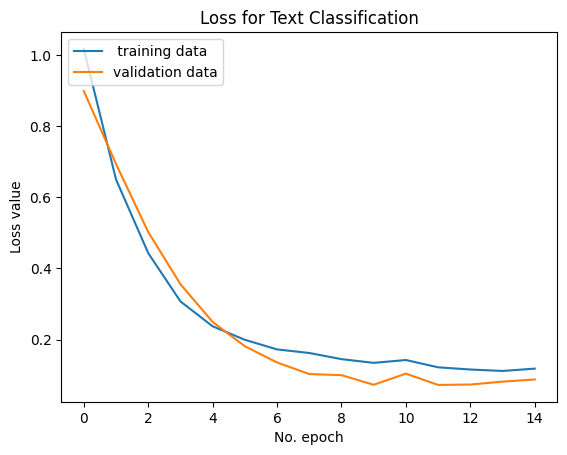

In [78]:
import matplotlib.pyplot as plt
plt.plot(history_CNN.history['loss'], label=' training data')
plt.plot(history_CNN.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

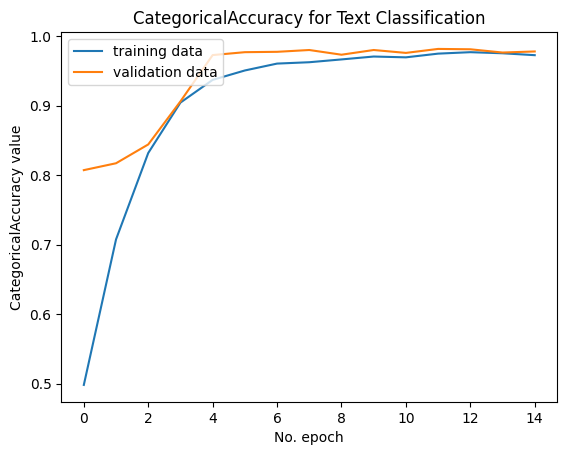

In [79]:
plt.plot(history_CNN.history['accuracy'], label='training data')
plt.plot(history_CNN.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [80]:
from tensorflow.keras.models import load_model

best_model_CNN = load_model('best_model_updated_CNN.h5')

In [81]:
print("Generate predictions for all samples")
predictions2 = best_model_CNN.predict(X_test)
print(predictions2)
predict_results2 = predictions2.argmax(axis=1)

Generate predictions for all samples
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0.01435773 0.01814471 0.9674976 ]
 [0.00595645 0.01085197 0.98319155]
 [0.02975001 0.04549165 0.9247584 ]
 ...
 [0.00328387 0.00337681 0.9933394 ]
 [0.0044883  0.00657479 0.98893696]
 [0.0056641  0.0085214  0.9858145 ]]


In [82]:

print(predict_results2.shape)
y_pred2 = predict_results2
print(y_pred2)

(2400,)
[2 2 2 ... 2 2 2]


In [83]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy_CNN: {accuracy2 * 100:.2f}%')

Accuracy_CNN: 98.42%


In [84]:
print(classification_report(y_test, y_pred2, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.88      0.97      0.92       218
     neutral       1.00      0.93      0.96       242
    positive       1.00      0.99      0.99      1940

    accuracy                           0.98      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.99      0.98      0.98      2400



Text(50.722222222222214, 0.5, 'y_pred')

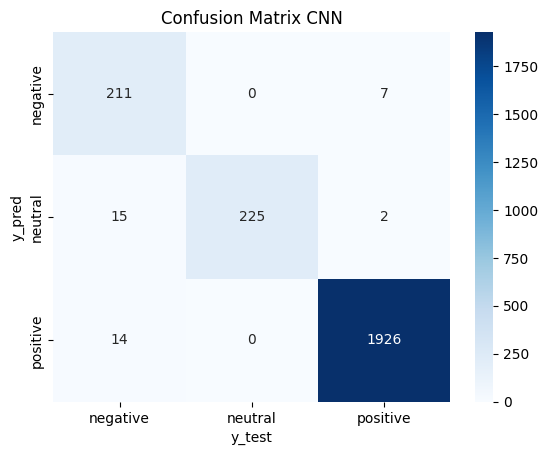

In [85]:

cm=confusion_matrix(y_test,y_pred2)
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix CNN')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

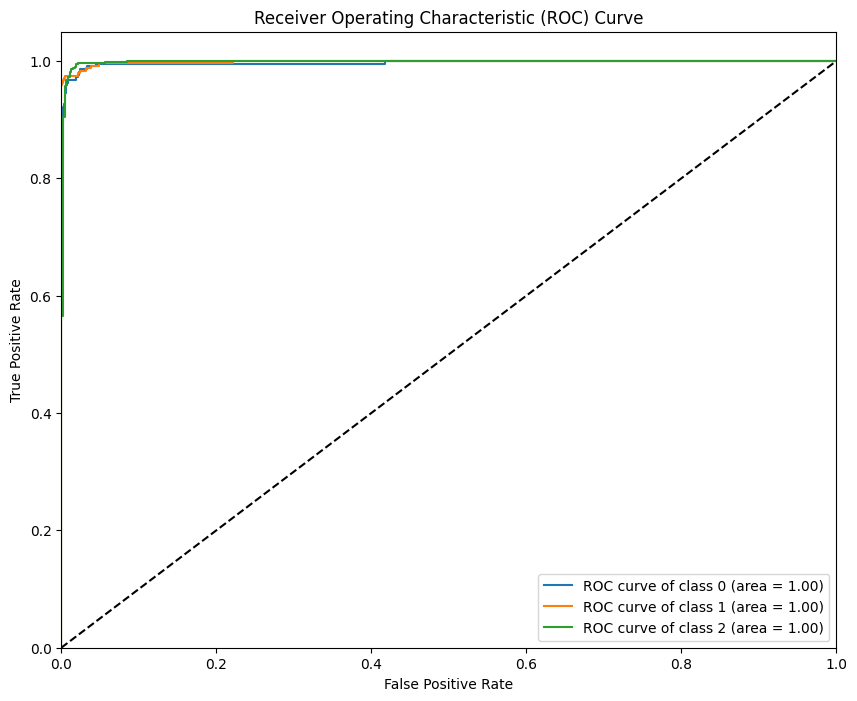

Micro-average ROC AUC score: 1.00
Macro-average ROC AUC score: 1.00


In [86]:
# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_val_binarized[:, i], predictions2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr2[i], tpr2[i])
mean_tpr /= n_classes

fpr2["macro"] = all_fpr
tpr2["macro"] = mean_tpr
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr2[i], tpr2[i], label=f'ROC curve of class {i} (area = {roc_auc2[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print micro-average and macro-average ROC AUC scores
print(f'Micro-average ROC AUC score: {roc_auc2["micro"]:.2f}')
print(f'Macro-average ROC AUC score: {roc_auc2["macro"]:.2f}')


# Now Applying RNN Model

In [87]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer = regularizers.l2(0.0005)),
    SimpleRNN(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    SimpleRNN(64),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Callbacks
callbacks3 = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated_RNN.h5', save_best_only=True)
]

In [89]:
# Fit the model with callbacks
history_RNN = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks3, class_weight=class_weights_dict)

Epoch 1/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3300 - loss: 1.8185

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.3305 - loss: 1.8126 - val_accuracy: 0.3115 - val_loss: 1.1717
Epoch 2/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4007 - loss: 1.2064

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4017 - loss: 1.2054 - val_accuracy: 0.5427 - val_loss: 0.9238
Epoch 3/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5138 - loss: 0.9521

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5147 - loss: 0.9506 - val_accuracy: 0.8479 - val_loss: 0.3983
Epoch 4/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6311 - loss: 0.6953

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6321 - loss: 0.6944 - val_accuracy: 0.8573 - val_loss: 0.3929
Epoch 5/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7267 - loss: 0.5814

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7278 - loss: 0.5800 - val_accuracy: 0.9333 - val_loss: 0.2442
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8308 - loss: 0.4417 - val_accuracy: 0.8896 - val_loss: 0.3584
Epoch 7/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8808 - loss: 0.3724

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8814 - loss: 0.3718 - val_accuracy: 0.9469 - val_loss: 0.1919
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9300 - loss: 0.3012 - val_accuracy: 0.9333 - val_loss: 0.2383
Epoch 9/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9353 - loss: 0.2935

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9352 - loss: 0.2934 - val_accuracy: 0.9464 - val_loss: 0.1864
Epoch 10/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9434 - loss: 0.2843

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9433 - loss: 0.2842 - val_accuracy: 0.9698 - val_loss: 0.1360
Epoch 11/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9499 - loss: 0.2422 - val_accuracy: 0.9651 - val_loss: 0.1435
Epoch 12/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9431 - loss: 0.2625 - val_accuracy: 0.8396 - val_loss: 0.6176
Epoch 13/15
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9567 - loss: 0.2249

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9569 - loss: 0.2244 - val_accuracy: 0.9776 - val_loss: 0.1194
Epoch 14/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9619 - loss: 0.2231 - val_accuracy: 0.9755 - val_loss: 0.1197
Epoch 15/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9586 - loss: 0.2284

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9586 - loss: 0.2282 - val_accuracy: 0.9776 - val_loss: 0.1146


# Not getting desired result from SimpleRNN, so trying GRU instead

In [90]:
from tensorflow.keras.layers import GRU

model = Sequential([
    Embedding(vocab_size + 1, embedding_dim, input_length=max_length, embeddings_regularizer=regularizers.l2(0.0005)),
    Bidirectional(GRU(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(GRU(64)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.0005), bias_regularizer=regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Callbacks
callbacks4 = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated_GRU.h5', save_best_only=True)
]

In [92]:
# Fit the model with callbacks
history_GRU = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=256, callbacks=callbacks4, class_weight=class_weights_dict)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.3193 - loss: 1.7658

30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.3203 - loss: 1.7586 - val_accuracy: 0.1406 - val_loss: 1.0948
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.4315 - loss: 1.1088

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.4323 - loss: 1.1053 - val_accuracy: 0.3266 - val_loss: 1.0233
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.5207 - loss: 0.7483

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.5216 - loss: 0.7479 - val_accuracy: 0.4745 - val_loss: 0.9864
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.6237 - loss: 0.6193

30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.6246 - loss: 0.6181 - val_accuracy: 0.5115 - val_loss: 0.9552
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7339 - loss: 0.4684

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.7347 - loss: 0.4678 - val_accuracy: 0.6885 - val_loss: 0.8648
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8274 - loss: 0.3988

30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.8279 - loss: 0.3983 - val_accuracy: 0.8594 - val_loss: 0.7147
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8862 - loss: 0.3000

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.8866 - loss: 0.2998 - val_accuracy: 0.8443 - val_loss: 0.6120
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9325 - loss: 0.2755

30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.9327 - loss: 0.2746 - val_accuracy: 0.9573 - val_loss: 0.4145
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9531 - loss: 0.2111

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9532 - loss: 0.2113 - val_accuracy: 0.9557 - val_loss: 0.3307
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.9658 - loss: 0.1890 - val_accuracy: 0.8641 - val_loss: 0.4176
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.9669 - loss: 0.1840 - val_accuracy: 0.8781 - val_loss: 0.3880
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.9666 - loss: 0.1778 - val_accuracy: 0.8594 - val_loss: 0.4184
Epoch 13/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.9735 - loss: 0.1714

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.9735 - loss: 0.1713 - val_accuracy: 0.9302 - val_loss: 0.2474
Epoch 14/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.9752 - loss: 0.1470 - val_accuracy: 0.8880 - val_loss: 0.3279
Epoch 15/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9746 - loss: 0.1582

30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9747 - loss: 0.1578 - val_accuracy: 0.9453 - val_loss: 0.1982


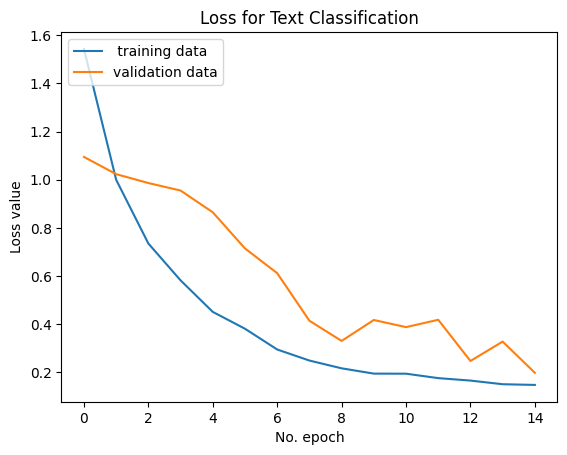

In [93]:
plt.plot(history_GRU.history['loss'], label=' training data')
plt.plot(history_GRU.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

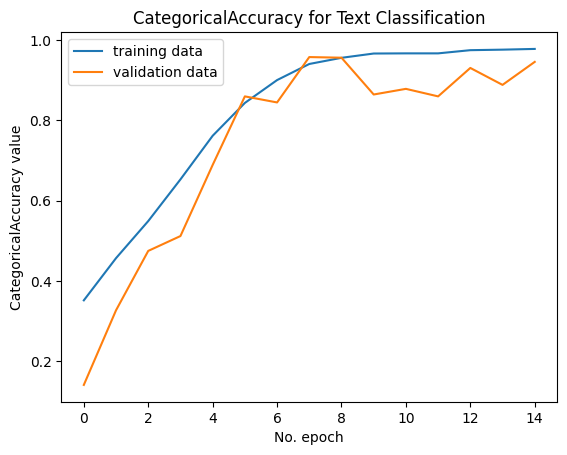

In [94]:
plt.plot(history_GRU.history['accuracy'], label='training data')
plt.plot(history_GRU.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [95]:

from tensorflow.keras.models import load_model

best_model_GRU = load_model('best_model_updated_GRU.h5')

In [96]:
print("Generate predictions for all samples")
predictions3 = best_model_GRU.predict(X_test)
print(predictions3)
predict_results3 = predictions3.argmax(axis=1)


Generate predictions for all samples
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
[[0.03007004 0.02414206 0.94578785]
 [0.01148002 0.01164633 0.97687364]
 [0.03567972 0.03189329 0.932427  ]
 ...
 [0.00625568 0.00360211 0.9901423 ]
 [0.00618337 0.00402565 0.989791  ]
 [0.01106797 0.00954261 0.9793895 ]]


In [97]:

print(predict_results3.shape)
y_pred3 = predict_results3
print(y_pred3)

(2400,)
[2 2 2 ... 2 2 2]


In [98]:

accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy_GRU: {accuracy3 * 100:.2f}%')

Accuracy_GRU: 93.83%


In [99]:

print(classification_report(y_test, y_pred3, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.78      0.72      0.75       218
     neutral       0.71      0.94      0.81       242
    positive       0.99      0.96      0.98      1940

    accuracy                           0.94      2400
   macro avg       0.83      0.87      0.84      2400
weighted avg       0.95      0.94      0.94      2400



Text(50.722222222222214, 0.5, 'y_pred')

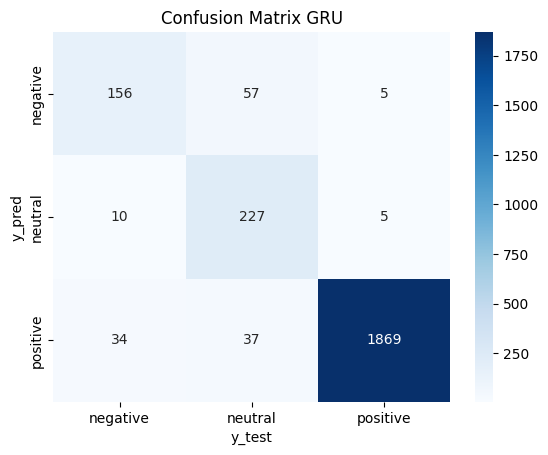

In [100]:

cm3=confusion_matrix(y_test,y_pred3)
ax=sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix GRU')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

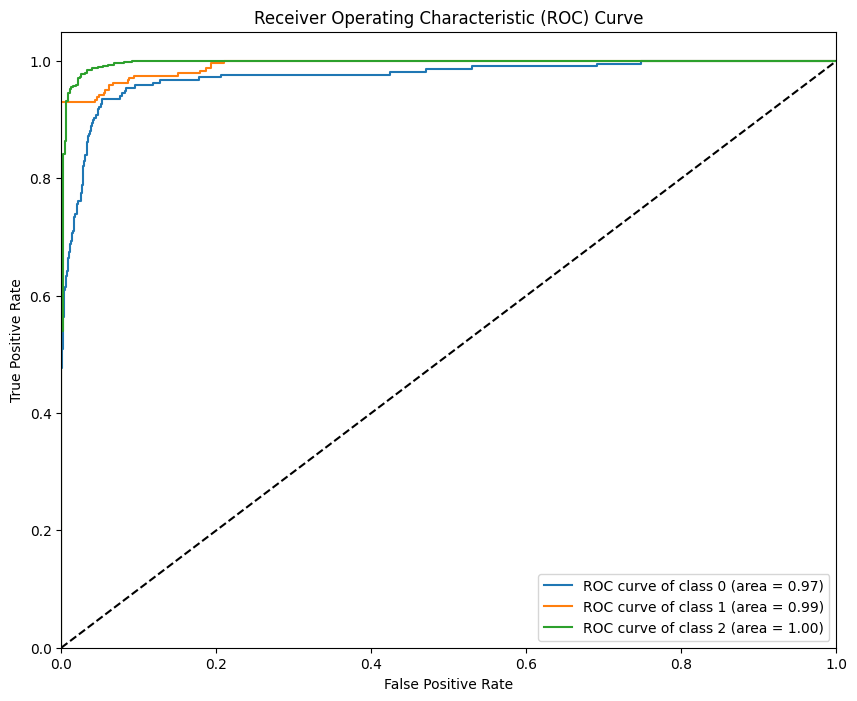

Micro-average ROC AUC score: 0.99
Macro-average ROC AUC score: 0.99


In [101]:
# Compute ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()

for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_val_binarized[:, i], predictions3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

# Compute micro-average ROC curve and ROC area
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr3[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr3[i], tpr3[i])
mean_tpr /= n_classes

fpr3["macro"] = all_fpr
tpr3["macro"] = mean_tpr
roc_auc3["macro"] = auc(fpr3["macro"], tpr3["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr3[i], tpr3[i], label=f'ROC curve of class {i} (area = {roc_auc3[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print micro-average and macro-average ROC AUC scores
print(f'Micro-average ROC AUC score: {roc_auc3["micro"]:.2f}')
print(f'Macro-average ROC AUC score: {roc_auc3["macro"]:.2f}')